In [20]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [21]:
N = 10
SEED = 1234
SCALE = 0.25

np.random.seed(SEED)

def true_fun(x):
  return np.sin(2 * np.pi * x)

def generate_noisy_data(x, scale=SCALE):
  y = true_fun(x) + np.random.normal(scale=scale, size=x.shape)
  return y

x_plot = np.arange(0, 1.01, 0.01)
y_plot = true_fun(x_plot)

# points with noise, will act as train data
x_train = np.linspace(0, 1, N)
y_train = generate_noisy_data(x_train)

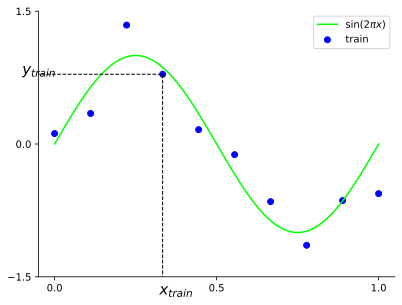

In [22]:
plt.plot(x_plot, y_plot, color='lime', label="$\\sin(2\\pi x)$")
plt.scatter(x_train, y_train, marker='o', color='blue', label="train")
plt.hlines(y=y_train[3], xmin=-2, xmax=x_train[3], linewidth=1, linestyle='--', color = 'k')
plt.vlines(x=x_train[3], ymin=-2, ymax=y_train[3], linewidth=1, linestyle='--', color = 'k')

plt.text(-0.1, y_train[3], "$y_{train}$", fontsize=15)
plt.text(x_train[3] - 0.01, -1.7, "$x_{train}$", fontsize=15)
plt.yticks( [-1.5, 0.0, 1.5] )
plt.xticks( [0.0, 0.5, 1.0] )
plt.xlim(-0.05, 1.05)
plt.ylim(-1.5, 1.5)
plt.legend();

In [70]:
def transform_features(X, m):
    # """ Create a polynomial of specified degrees """
    return (X.reshape(-1,1) * np.ones((1,m+1))) ** np.arange(m+1) 

# examples of creating the polynomial features
features_m_0 = transform_features(x_train, m=0)
features_m_1 = transform_features(x_train, m=1)
features_m_3 = transform_features(x_train, m=3)
features_m_9 = transform_features(x_train, m=9)

In [ ]:
def multiple_regression_fit(features, y_train):
    A_t = features.T @ features 
    weight_vector = np.linalg.solve(A_t, features.T @ y_train)
    return weight_vector